### Import dependencies

In [2]:
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
from torch.utils.data  import random_split
import torch.optim as optim
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import tqdm

Import different models

In [3]:
from torchvision import models

### Define device and path

In [4]:
# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Current device:', device)

# Allocate path to the dataset
path = '/Users/patrickstar/Desktop/courses/ASU/EEE598_DeepLearning/FinalProject/Logo-2K+_WithoutCategory'

Current device: cpu


### Load and show the dataset

In [5]:
# Define transformer
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Apply transformer to the dataset
dataset = datasets.ImageFolder(path, transform=transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2237


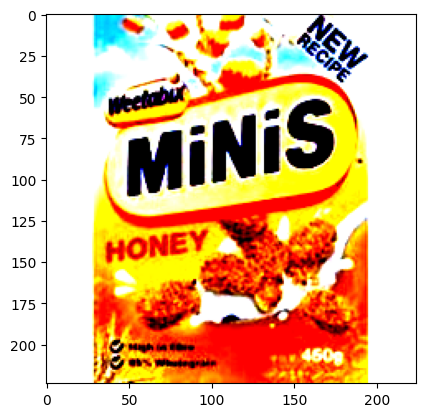

In [31]:
# Show the images
index = 160000
img, label = dataset[index]
img_rgb = img.permute(1, 2, 0)
print(label)
plt.imshow(img_rgb)
plt.show()

Split dataset and create dataloader

In [6]:
# Split training dataset(80-10-10)
train_size = int(0.8*len(dataset))
test_size = len(dataset) - train_size
train_data, test_data = random_split(dataset, [train_size, test_size])

# Create DataLoader for batch
train_loader = DataLoader(dataset=train_data, batch_size=256, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=256, shuffle=False)

# Print out the number of classes
num_classes = len(dataset.class_to_idx)
print(num_classes)

2338


### Define model

In [33]:
model = models.alexnet(pretrained=False)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)

/opt/homebrew/Caskroom/miniforge/base/envs/DP/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/DP/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [34]:
from torchsummary import summary
summary(model=model, input_size=(3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

Define Hyperparameters

In [10]:
num_epochs = 1
lr = 0.0001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

### Training session

Define training and testing function

In [9]:
def train_model(model, train_loader, optimizer, criterion, device):
    model.train()
    running_loss = 0
    total_img = 0
    correct = 0
    
    # Training loop
    for imgs, labels in tqdm.tqdm(train_loader, desc='Training', leave=False):
        # Move to device
        imgs, labels = imgs.to(device), labels.to(device)

        # Forward pass
        outputs = model(imgs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Loss
        running_loss = loss.item()
        _, predicted = outputs.max(1)
        correct += (predicted == labels).sum().item()
        total_img += labels.size(0)
    
    avg_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total_img

    return avg_loss, accuracy


def test_model(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0
    correct = 0
    total_img = 0

    with torch.no_grad():
        for imgs, labels in tqdm.tqdm(test_loader, desc='Testing', leave=False):
            # Move to device
            imgs, labels = imgs.to(device), labels.to(device)

            # Forward pass
            outputs = model(imgs)
            loss = criterion(outputs, labels)

            # Loss
            running_loss = loss.item()
            _, predicted = outputs.max(1)
            correct += (predicted == labels).sum().item()
            total_img += labels.size(0)
    avg_loss = running_loss / len(test_loader)
    accuracy = 100 * correct / total_img

    return avg_loss, accuracy

Training loop

In [ ]:
for epoch in range(num_epochs):
    print(f'Epoch: {epoch}/{num_epochs}')

    # Train the model
    train_loss, train_accuracy = train_model(model, train_loader, optimizer, criterion, device)
    print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")

    # Testing the model
    test_loss, test_accuracy = test_model(model, test_loader, criterion, device)
    print(f"Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy}")


# Save the trained model
alex_path = '/Users/patrickstar/Desktop/courses/ASU/EEE598_DeepLearning/FinalProject/ProjectCode/'
torch.save(model.state_dict(), f"{alex_path}AlexNet.pth")

Epoch: 0/1


IndexError: Target 1260 is out of bounds.

In [7]:
# Load in trained AlexNet
model = models.alexnet(pretrained=None)
alex_path = '/Users/patrickstar/Desktop/courses/ASU/EEE598_DeepLearning/FinalProject/ProjectCode/AlexNet.pth'
state_dict = torch.load(alex_path)

model.load_state_dict(state_dict)

/opt/homebrew/Caskroom/miniforge/base/envs/DP/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/DP/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/var/folders/ky/3wgwjxz56ssd31l4s6xm89qw0000gn/T/ipykernel_69694/4008820145.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more det

<All keys matched successfully>

Make prediction on a random image

In [17]:
from PIL import Image

test_image_path = 'images.png'

image = Image.open(test_image_path)

# Define transformer
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image_tensor = transform(image).unsqueeze(0)


with torch.no_grad():
    output = model(image_tensor)
_, predicted = torch.max(output, 1)

print(predicted[0])

for img, label in dataset:
    if predicted == label:
        img_rgb = img.permute(1, 2, 0)
        Image.open(img_rgb)
        break

tensor(745)


AttributeError: 'Tensor' object has no attribute 'read'

Training custom ResNet

In [15]:
# Test input size
import random

rand_index = random.randint(0, train_size)

rand_image, rand_lab = dataset[rand_index]

# Define transformer
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# image_tensor = transform(rand_image).unsqueeze(0)
input_size = rand_image.shape
print(input_size)

torch.Size([3, 224, 224])


In [ ]:
from structures.ResNet59 import CustomResNet, ResidualBlock
from torchsummary import summary

# Define model (60-layers ResNet)
model_res60 = CustomResNet(ResidualBlock, [3, 6, 8, 2], num_classes=num_classes)

# Define Hyperparameters
num_epochs = 1
lr = 0.0001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_res60.parameters(), lr=lr)

# Summarize the structure
model_summary = summary(model_res60, input_size)

RuntimeError: Given groups=1, weight of size [256, 128, 3, 3], expected input[2, 256, 28, 28] to have 128 channels, but got 256 channels instead

In [ ]:
# Training loop
for epoch in range(num_epochs):
    print(f'Epoch: {epoch}/{num_epochs}')

    # Train the model
    train_loss, train_accuracy = train_model(model_res60, train_loader, optimizer, criterion, device)
    print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")

    # Testing the model
    test_loss, test_accuracy = test_model(model_res60, test_loader, criterion, device)
    print(f"Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy}")


Epoch: 0/1


RuntimeError: Given groups=1, weight of size [256, 128, 3, 3], expected input[256, 256, 28, 28] to have 128 channels, but got 256 channels instead

GoogLeNet

In [ ]:
g_model = models.